# ATIAM - Fundamentals project
## Sequence alignment
Author: Philippe Esling (esling@ircam.fr)

This notebook defines the overall exercise for the ATIAM data structure course.

**General indications**
 - You should use this as a baseline notebook
 - You are authorized to define other files for functions
 - Write a (small) report document (PDF) explaining your approach
 - All your files should be packed in a zip file named
     [ATIAM][FpA2024]FirstName_LastName.zip

**Deadline**: 14/11/2024 @ 23:59

In [1]:
# Define mode (keep it on False, this is just for my generative part)
DEV_MODE=False
# Basic set of imports (here you can see if everything passes)
import os
import pickle
import string

#%% Here collect the whole set of tracks
if DEV_MODE:
    # Define MIDI extension
    midExt = ['mid', 'midi', 'MID', 'MIDI']
    # Root directory
    root = '/Users/esling/Coding/learning/orchestral-db/data'
    database = {}
    composers = []
    composers_tracks = {}
    tracks = []
    # List composers first
    for item in os.listdir(root):
        if os.path.isdir(os.path.join(root, item)):
            composers.append(item)
    print('Found ' + str(len(composers)) + ' composers.')
    prev_letter = ''
    # now parse tracks
    for comp in sorted(composers):
        # Print advance
        if (comp[0] != prev_letter):
            prev_letter = comp[0]
            print('   - Composers starting with ' + prev_letter)
        # Check each sub-folder
        for item in os.listdir(os.path.join(root, comp)):
            cur_path = os.path.join(os.path.join(root, comp), item)
            if os.path.isdir(cur_path):
                for files in os.listdir(cur_path):
                    if (os.path.splitext(files)[1][1:] in midExt):
                        tracks.append(item)
                        if comp in composers_tracks.keys():
                            composers_tracks[comp].append(item)
                        else:
                            composers_tracks[comp] = [item]
    print('Found ' + str(len(tracks)) + ' tracks.')
    midi_database = {'composers':composers, 'composers_tracks':composers_tracks}
    pickle.dump(midi_database, open("atiam-fpa.pkl", "wb"))
else:
    midi_database = pickle.load(open("atiam-fpa.pkl", "rb"))
    composers = midi_database['composers']
    composers_tracks = midi_database['composers_tracks']

## Part 1 - Exploration

**Exploring a track collections (text dictionnaries) and playing with MIDI**

In this part, we will start easy by looking at a collection of tracks.
The set of classical music pieces is provided in the _atiam-fpa.pkl_ file, which
is already loaded at this point of the script and contain two structures
- `composers`         = Array of all composers in the database
- `composers_tracks`  = Hashtable of tracks for a given composer
    
Some examples of the content of these structures
```python
# Names of composers
composers[23] => 'Abela, Placido'
composers[1210]  => 'Beethoven, Ludwig van'
# List of tracks for each composer
composers_tracks['Abela, Placido'] => ['Ave Maria(Meditation on Prelude No. 1 by J.S.Bach)']
composers_tracks['Beethoven, Ludwig van'] => ['Drinking Song', 'Sonatine No. 3 for Mandolin and Piano', ...]
# Retrieve the first track of 
composers_tracks['Beethoven, Ludwig van'][0] => 'Drinking Song'
```

In [2]:
# Here an example: print all composers with more than 10 tracks
for composer,tracks in sorted(composers_tracks.items()):
    if (len(tracks) >= 10):
        print(composer + ' : ' + str(len(tracks)) + ' tracks.')

Abel, Carl Friedrich : 27 tracks.
Aboyan, Gayk : 554 tracks.
Abt, Franz : 38 tracks.
Adam, Adolphe : 11 tracks.
Adson, John : 71 tracks.
Agincour, François d' : 15 tracks.
Agrell, Johan : 84 tracks.
Agricola, Alexander : 12 tracks.
Aguado, Dionisio : 28 tracks.
Ahle, Johann Rudolf : 18 tracks.
Aiblinger, Johann Kaspar : 18 tracks.
Aichinger, Gregor : 12 tracks.
Alain, Jehan : 13 tracks.
Albeniz, Isaac : 49 tracks.
Albert, Heinrich : 10 tracks.
Albinoni, Tomaso : 170 tracks.
Albrechtsberger, Johann Georg : 89 tracks.
Aleotti, Vittoria : 18 tracks.
Alexandra, Liana : 12 tracks.
Alink, Bert : 22 tracks.
Alkan, Charles-Valentin : 30 tracks.
Allegri, Lorenzo : 12 tracks.
Allison, Richard : 177 tracks.
Alsen, Wulf Dieter : 38 tracks.
Altenburg, Johann Ernst : 28 tracks.
Altenburg, Michael : 26 tracks.
Alıcıoğlu, Şafak : 75 tracks.
Ammer, Manfred : 114 tracks.
Anderson, Leigh : 10 tracks.
André, Johann Anton : 11 tracks.
Anglebert : 67 tracks.
Anonymous : 27 tracks.
Anonymus, .... : 899 t

<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Q 1.1 [1 pt] - Implement array sorting 

> 1. Reimplement the quicksort algorithm.
> 2. Show your results on different types of array

</div>

In [3]:
def my_sort(array):
    sorted_array = array.copy()
    left = 0
    right = len(sorted_array) - 1
    if left >= right:
        return sorted_array
    stack = []
    while stack or left < right:
        if left < right:
            pivot = left
            i, j = left, right
            while i < j:
                while sorted_array[pivot] <= sorted_array[j] and i < j:
                    j -= 1
                while sorted_array[pivot] >= sorted_array[i] and i < j:
                    i += 1
                if i < j:
                    sorted_array[i], sorted_array[j] = sorted_array[j], sorted_array[i]
            sorted_array[pivot], sorted_array[i] = sorted_array[i], sorted_array[pivot]
            stack.append((left, i, right))
            right = i - 1
        else:
            left, mid, right = stack.pop()
            left = mid + 1
    return sorted_array

In [4]:
array = [5, 3, 8, 4, 2, 7, 1, 10, 6, 9]
print(my_sort(array))
array = ['a', 'c', 'b', 'e', 'd']
print(my_sort(array))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
['a', 'b', 'c', 'd', 'e']


<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Q 1.2 [1 pt] - Sort a composer array

> 1. Use your own algorithm to sort the collection of composers by decreasing number of tracks

</div>

In [5]:
tracksnumber_composers = []
for composer,tracks in composers_tracks.items():
    tracksnumber_composers.append((len(tracks), composer))

sorted_tracksnumber_composers = my_sort(tracksnumber_composers)
sorted_tracksnumber_composers.reverse()

# show first 10 composers with most tracks
for tracknumber, composer in sorted_tracksnumber_composers[:10]:
    print(composer + ' : ' + str(tracknumber) + ' tracks.')


Rondeau, Michel : 2720 tracks.
Gouin, Pierre : 2333 tracks.
Knuth, Jürgen : 1641 tracks.
Bach, Johann Sebastian : 1463 tracks.
Mozart, Wolfgang Amadeus : 1250 tracks.
Schubert, Franz : 1083 tracks.
Bach, August Wilhelm : 1004 tracks.
Handel, George Frideric : 906 tracks.
Anonymus, .... : 899 tracks.
Beethoven, Ludwig van : 801 tracks.


<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Q 1.3 [1 pt] - Extending sort

> 1. Extend your sorting procedure, to sort all tracks from all composers alphabetically 
> 2. Evaluate the running time of your algorithm

</div>

In [6]:
import time

start = time.time()
all_tracks = []
for composer, tracks in composers_tracks.items():
    all_tracks.append(tracks)
all_tracks = [item for sublist in all_tracks for item in sublist]
all_tracks = my_sort(all_tracks)
end = time.time()

print('Time spent : ' + str(end - start))
# print first 10 tracks
for track in all_tracks[:10]:
    print(track)

Time spent : 0.7040786743164062
 Ostia 
 REMIX AE I 
 Tritto 
!st Piece
"A Bit of Everything" by De Rougemont
"A tanto duol, quest' anima"   from  "Bianca e Fernando"
"Abendruhe" (In turn, silent night has surrounded our circle)
"Agnus Dei" from the Coronation Mass (Low Version)
"Air on the G String" from Orchestral Suite No. 2 in D Major, arr.
"Air on the G String" from Orchestral Suite No. 3 in D Major


## Introducing MIDI 

In addition to our composition pickle file, you can find some example MIDI files in the `atiam-fpa/` folder. In this part, we are going to *import and plot* the different MIDI files. We recommend to use the `pretty_midi` library 
```bash
pip install pretty_midi
```

Based on the provided MIDI files (random subset of Beethoven tracks), you will have to import, plot and compare the different files.

<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Q 1.4 [1 pt] - Basic operations

> 1. Import random tracks from the folder
> 2. Plot (display) the content, either as piano rolls or score.

</div>


In [7]:
!pip install pretty_midi

Error processing beethoven_15.mid: data byte must be in range 0..127


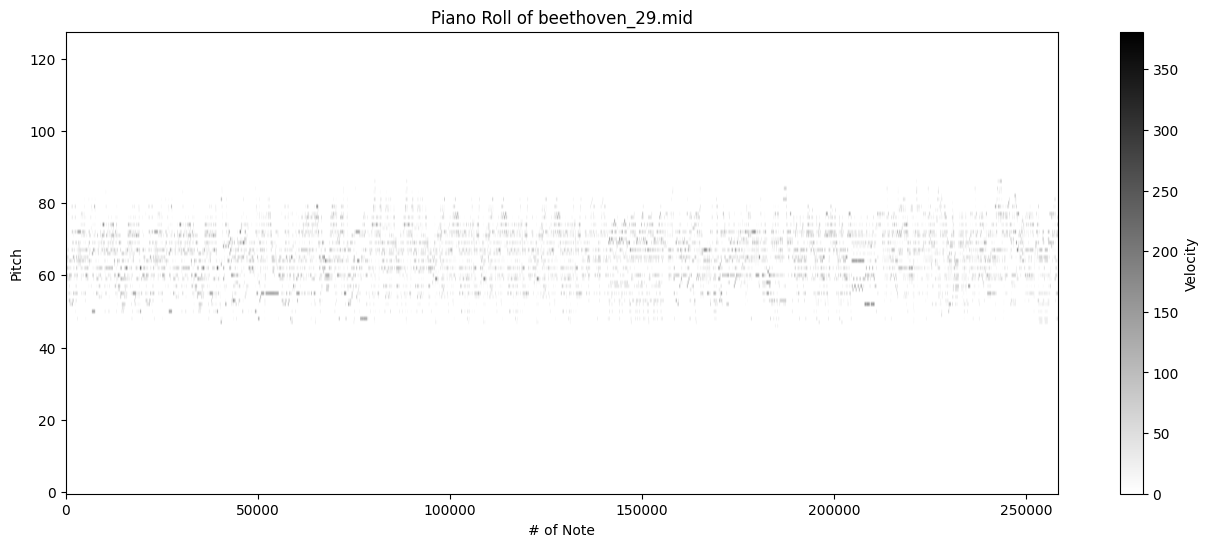

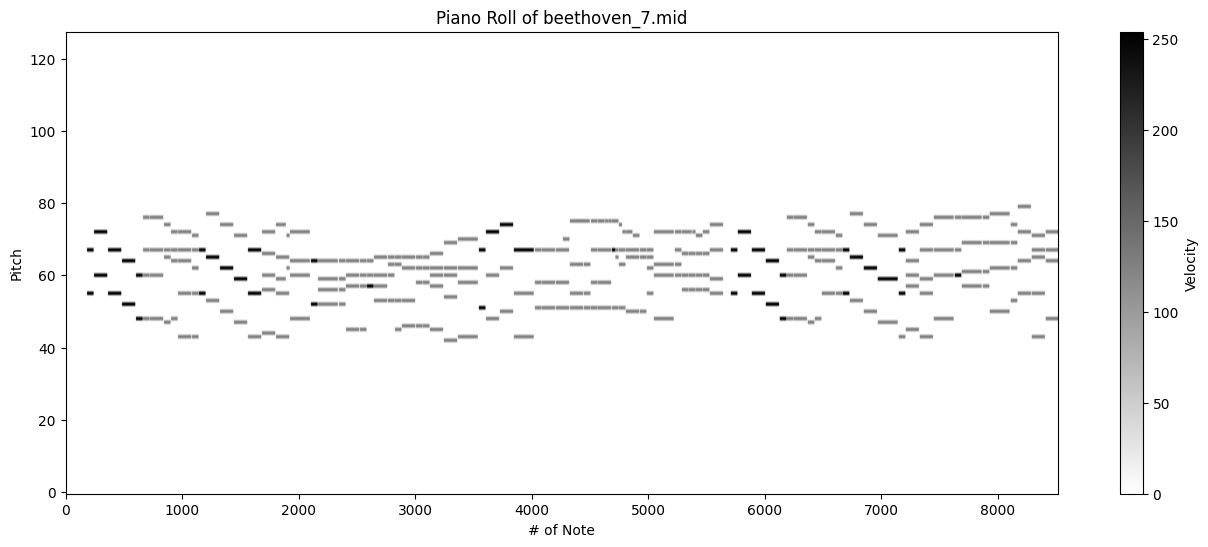

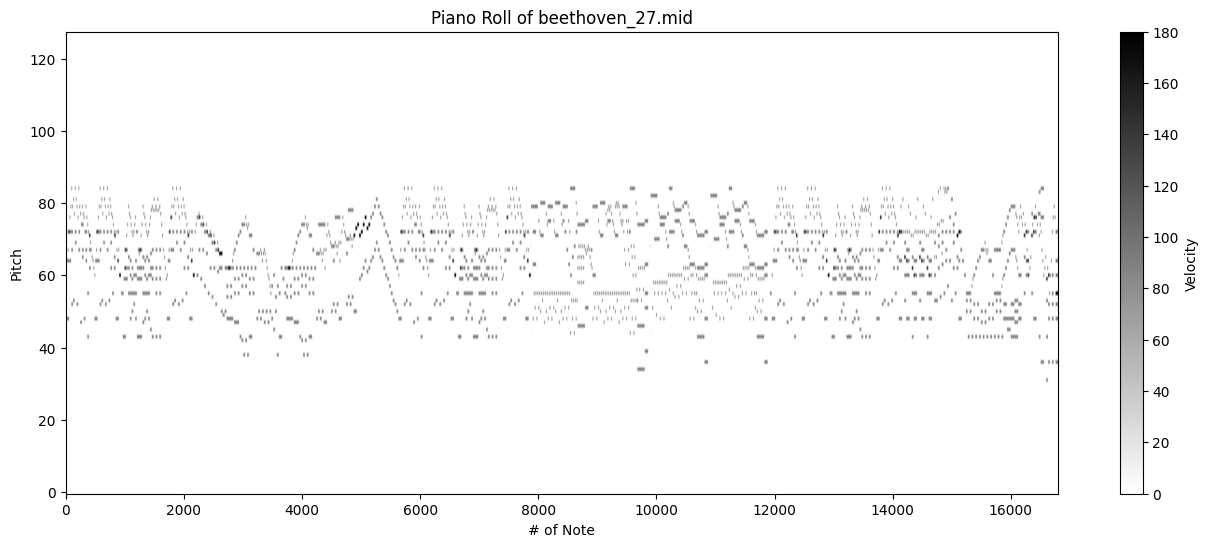

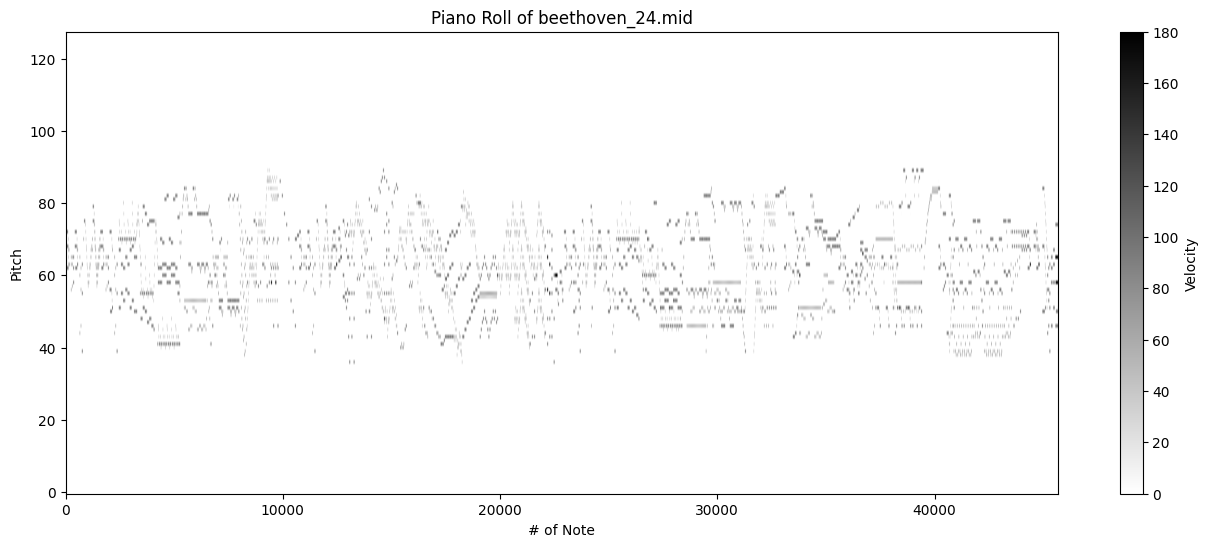

In [8]:
import random
import matplotlib.pyplot as plt
import pretty_midi as pm

# import random tracks from the folder
midi_folder = os.path.join(os.getcwd(),"atiam-fpa")
midi_names = os.listdir(midi_folder)

random_midis = random.sample(midi_names, 5)

midi_tracks = []
for midi_name in random_midis:
    try:
        midi_tracks.append(pm.PrettyMIDI(os.path.join(midi_folder, midi_name)))
    except OSError as e:
        print(f"Error processing {midi_name}: {e}")

# display the contents as piano rolls
for i, midi_track in enumerate(midi_tracks):
    midi_content = midi_track.get_piano_roll()
    plt.figure(figsize=(16, 6))
    plt.imshow(midi_content, aspect='auto', origin='lower', cmap='gray_r')
    plt.title(f'Piano Roll of {random_midis[i]}')
    plt.xlabel('# of Note')
    plt.ylabel('Pitch')
    plt.colorbar(label='Velocity')
    plt.show()


<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Q 1.5 [1 pt] - Statistics operations

> 1. Write a function counting the number of notes played in a given MIDI file.
> 2. Sort the set of MIDI files based on the number of notes.

</div>

In [9]:
import numpy as np

def get_midi_notes_number(midi_file):
    return np.count_nonzero(midi_file.get_piano_roll())

notenumber_midinames = []
for midi_name in midi_names:
    try:
        midi_track = pm.PrettyMIDI(os.path.join(midi_folder, midi_name))
        notenumber_midinames.append((get_midi_notes_number(midi_track), midi_name))
    except OSError as e:
        print(f"Error processing {midi_name}: {e}")

sorted_notenumber_midinames = my_sort(notenumber_midinames)

for notenumber, midi_name in sorted_notenumber_midinames:
    print(midi_name + ' : ' + str(notenumber) + ' notes.')

Error processing beethoven_15.mid: data byte must be in range 0..127


/opt/anaconda3/envs/ml_mac/lib/python3.11/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


beethoven_23.mid : 13863 notes.
beethoven_0.mid : 15020 notes.
beethoven_1.mid : 19602 notes.
beethoven_8.mid : 19602 notes.
beethoven_10.mid : 20701 notes.
beethoven_11.mid : 22265 notes.
beethoven_16.mid : 23955 notes.
beethoven_14.mid : 25372 notes.
beethoven_2.mid : 28409 notes.
beethoven_7.mid : 28409 notes.
beethoven_6.mid : 30022 notes.
beethoven_20.mid : 33881 notes.
beethoven_9.mid : 35848 notes.
beethoven_25.mid : 44099 notes.
beethoven_27.mid : 47032 notes.
beethoven_19.mid : 51932 notes.
beethoven_22.mid : 53556 notes.
beethoven_5.mid : 58151 notes.
beethoven_18.mid : 68507 notes.
beethoven_24.mid : 101003 notes.
beethoven_21.mid : 120845 notes.
beethoven_3.mid : 121073 notes.
beethoven_26.mid : 226645 notes.
beethoven_29.mid : 537436 notes.
beethoven_13.mid : 866941 notes.


## Part 2 - Symbolic alignments

In this part, we will use our knowledge on computer structures to solve a very well-known problem of **string alignement**. Hence, this part is split between
1. Implementing the string alignment algorithm
2. Trying to apply this to the collection of **names** of classical music pieces
3. Developing your own more adapted procedure to have a matching inside large set
  
The set of classical music pieces is provided in the `atiam-fpa.pkl` file, which is already loaded at this point of the script and contain two structures
- `composers`         = Array of all composers in the database
- `composers_tracks`  = Hashtable of tracks for a given composer
    
Some examples of the content of these structures

```python
composers[23] => 'Abela, Placido'
composers[1210]  => 'Beethoven, Ludwig van'

composers_tracks['Abela, Placido'] => ['Ave Maria(Meditation on Prelude No. 1 by J.S.Bach)']
composers_tracks['Beethoven, Ludwig van'] => ['"Ode to Joy"  (Arrang.)', '10 National Airs with Variations, Op.107 ', ...]

composers_tracks['Beethoven, Ludwig van'][0] => '"Ode to Joy"  (Arrang.)'
```

### Needleman-Wunsch algorithm

In order to obtain a string alignment, we are going to rely on the [Needleman-Wunsch (NW)](https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm) algorithm. You can find the definition of the basic NW algorithm on Wikipedia:

https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm

In order to check your own implementation, you can use the `minineedle` library that provides different versions of the NW algorithm.

In [10]:
!pip install minineedle

In [11]:
from minineedle import needle, core
seq1 = "CEELECANTH"; seq2 = "PELICAN"
alignment: needle.NeedlemanWunsch[str] = needle.NeedlemanWunsch(seq1, seq2)
# Change the matrix and run
alignment.change_matrix(core.ScoreMatrix(match=4, miss=-4, gap=-2))
alignment.align()
# Print the sequences aligned
print(alignment)

Alignment of SEQUENCE 1 and SEQUENCE 2:
	CEELECANTH
	-PELICAN--



<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Q 2.1 [3 pts] - Alignment algorithm

> 1. Write the basic NW algorithm.
> 2. In this first version, we will be implementing the _basic_ gap costs
> 3. Remember to rely on a user-defined matrix for symbols distance

</div>

In [12]:
import pandas as pd

def my_needleman_simple(str1, str2, matrix='atiam-fpa_alpha.dist', gap_open=-5, gap_extend=-5):
    score = 0
    # initialization
    dist_matrix = pd.read_csv(matrix, sep='\s+', index_col=0)
    gap = gap_open
    n = len(str1)
    m = len(str2)
    score_matrix = np.zeros((n+1, m+1))
    # fill the first row and column
    for i in range(1, n+1):
        score_matrix[i][0] = score_matrix[i-1][0] + gap
    for j in range(1, m+1):
        score_matrix[0][j] = score_matrix[0][j-1] + gap
    # fill the matrix
    for i in range(1, n+1):
        for j in range(1, m+1):
            match = score_matrix[i-1][j-1] + dist_matrix[str1[i-1]][str2[j-1]]
            delete = score_matrix[i-1][j] + gap
            insert = score_matrix[i][j-1] + gap
            score_matrix[i][j] = max(match, delete, insert)
    # traceback
    align1 = ""
    align2 = ""
    i, j = n, m
    while i > 0 and j > 0:
        score = score_matrix[i][j]
        score_diag = score_matrix[i-1][j-1]
        score_up = score_matrix[i-1][j]
        score_left = score_matrix[i][j-1]
        if score == score_diag + dist_matrix[str1[i-1]][str2[j-1]]:
            align1 = str1[i-1] + align1
            align2 = str2[j-1] + align2
            i -= 1
            j -= 1
        elif score == score_up + gap:
            align1 = str1[i-1] + align1
            align2 = "-" + align2
            i -= 1
        elif score == score_left + gap:
            align1 = "-" + align1
            align2 = str2[j-1] + align2
            j -= 1
    while i > 0:
        align1 = str1[i-1] + align1
        align2 = "-" + align2
        i -= 1
    while j > 0:
        align1 = "-" + align1
        align2 = str2[j-1] + align2
        j -= 1
    score = score_matrix[n][m]
    return (align1, align2, score)

In [13]:
align1, align2, score = my_needleman_simple(seq1, seq2)
print(align1)
print(align2)
print(score)

CEELECANTH
-PELICAN--
4.0


<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Q 2.2 [1 pt] - Application to musical track names

> 1. For each track of a composer, compare to all remaining tracks of the same composer
> 2. Establish a cut criterion (what is the relevant similarity level ?) to only print relevant matches
> 3. Propose a set of matching tracks and save it through Pickle

</div>

In [14]:
import re

def remove_punctuation(input_str):
    filtered_str = re.sub(r'[^A-Za-z]', '', input_str)
    return filtered_str.upper()

def get_similarity(composer, tracks, criteria=0):
    result = pd.DataFrame(columns=['composer','tracks'])
    similar_tracks = []
    if len(tracks) <= 1:
        similar_tracks = tracks
    else:
        tracks = list(set(tracks))
        for i in range(len(tracks)):
            for j in range(i+1, len(tracks)):
                if tracks[i] == tracks[j]:
                    continue
                seq1 = remove_punctuation(tracks[i])
                seq2 = remove_punctuation(tracks[j])
                if seq1 == seq2:
                    if tracks[i] and tracks[j] not in similar_tracks:
                        print(f"\t{tracks[i]} \t {tracks[j]}")
                    if tracks[i] not in similar_tracks:
                        similar_tracks.append(tracks[i])
                    if tracks[j] not in similar_tracks:
                        similar_tracks.append(tracks[j])
                else:
                    if (tracks[i] or tracks[j]) not in similar_tracks:
                        _, _, score = my_needleman_simple(seq1, seq2)
                        if score > criteria:
                            if tracks[i] and tracks[j] not in similar_tracks:
                                print(f"\t{tracks[i]} \t {tracks[j]}")
                            if tracks[i] not in similar_tracks:
                                similar_tracks.append(tracks[i])
                            if tracks[j] not in similar_tracks:
                                similar_tracks.append(tracks[j])
    result['composer'] = [composer] 
    result['tracks'] = [similar_tracks]
    return result

result = get_similarity('Abel, Carl Friedrich', composers_tracks['Abel, Carl Friedrich'], 10)

# save through pickle
pickle.dump(result, open("similar_tracks.pkl", "wb"))


	Trio Sonata in B-flat major, WK 117  	 Trio Sonata in F major, WK 122 
	six_sonates_pour_le_clavecin_3_1 	 six_sonates_pour_le_clavecin_5_1
	six_sonates_pour_le_clavecin_3_1 	 six_sonates_pour_le_clavecin_2_1
	six_sonates_pour_le_clavecin_3_1 	 six_sonates_pour_le_clavecin_1_2
	six_sonates_pour_le_clavecin_3_1 	 six_sonates_pour_le_clavecin_2_2
	six_sonates_pour_le_clavecin_3_1 	 six_sonates_pour_le_clavecin_6_1
	six_sonates_pour_le_clavecin_3_1 	 six_sonates_pour_le_clavecin_3_2
	six_sonates_pour_le_clavecin_3_1 	 six_sonates_pour_le_clavecin_1_1
	six_sonates_pour_le_clavecin_3_1 	 six_sonates_pour_le_clavecin_6_2
	six_sonates_pour_le_clavecin_3_1 	 six_sonates_pour_le_clavecin_4_1
	six_sonates_pour_le_clavecin_3_1 	 six_sonates_pour_le_clavecin_4_2
	six_sonates_pour_le_clavecin_3_1 	 six_sonates_pour_le_clavecin_5_2
	sonata_e_minor_3 	 sonata_e_minor_1
	sonata_e_minor_3 	 sonata_e_minor_2
	Trio Sonata in E major, WK 119  	 Trio Sonata in A major, WK 121 
	Trio Sonata in G major, WK 

<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Q 2.3 [2 pts] - Advanced properties extensions

> 1. Try to compare a given track to all tracks of all composers (full database)
> 2. As the time taken is untractable (computational explosion), propose a method to avoid such a huge amount of computation
> 3. Propose a set of matching tracks and save it through Pickle

</div>

In [15]:
def get_similarity_track_track(target_track, tracks, criteria=0):
    seq1 = remove_punctuation(target_track)
    similar_tracks = []
    if len(tracks) <= 1:
        similar_tracks = tracks
    else:
        tracks = list(set(tracks))
        for i in range(len(tracks)):
            if tracks[i] not in similar_tracks:
                seq2 = remove_punctuation(tracks[i])
                if seq1 == seq2:
                    similar_tracks.append(tracks[i])
                    print(f"{tracks[i]}")
                else:
                    _, _, score = my_needleman_simple(seq1, seq2)
                    if score > criteria:
                        similar_tracks.append(tracks[i])
                        print(f"{tracks[i]}")
    return similar_tracks

all_tracks = []
for composer, tracks in composers_tracks.items():
    all_tracks.append(tracks)
all_tracks = [item for sublist in all_tracks for item in sublist]

result = get_similarity_track_track('sonata_e_minor_2', all_tracks, 30)


sonata_in_e_minor_op_7
Sonata à 5 in E minor, WP 2.24 
Sonata B Major
sonata_1_f-major_4
Sonata in E minor
Sonata 11 in F-Minor
trio_sonata_g-minor_2
Toccata B-minor
sonata_fminor
sonata_1_f-major_1
sonata_e_minor_3
Sonata in G minor, Z.807 
Sonata E Minor
Sonata D Minor
Sonata in A Minor
Sonata No. 47 in B-minor
sonata_1_f-major_3
Sonata in D minor 
Sonata III in E minor
Sonata in C Minor
Toccata D Minor
trio_sonata_g-minor_4
Sonata in E Minor
Sonatina in A Minor
Sonata in B minor, Z.802 
sonata_in_a_minor
Song A Minor
Sonata in F Minor
Sonata in D Minor
sonata_g_major_2
trio_sonata_g-minor_1
trio_sonata_g-minor_3
Sonata G Minoe
Sonata in A minor 
sonata_cminor
sonata_1_f-major_5
Sonata G Major
sonata_e_minor_1
Sonata F Major
Sonata in C minor
Sonatine in C Minor
Sonata C Major
Sonata Nr. 4 in A Minor
sonata_g_major_1
Sonata in A minor
sonata_e_minor_2
Sonata Nr. 14 in A Minor
sonata_1_f-major_2
Sonata in G Minor
Toccata E Minor
Sonatina in E Minor
Sonata g-minor
Sonata G- Minor (Edi

## Part 3 - Musically-informed track names alignment

You might have seen from the previous results that
- Purely string matching on classical music names is not the best approach
- This mostly comes from the fact that the importance of symbols is not the same
- For instance 
  * "Symphony for orchestra in D minor"
  * "Symphony for orchestra in E minor"
Looks extremely close but the key is the most important symbol
  
Another flaw in our approach is that the NW algorithm treats all gaps equivalently. Hence, it can put lots of small gaps everywhere. Regarding alignement, it would be better to have long coherent gaps rather than small ones. This is handled by a mecanism known as _affine gap penalty_ which separates the costs of either _opening_ or _extending_ a gap. This is known as the Gotoh algorithm, which can be found here :

http://helios.mi.parisdescartes.fr/~lomn/Cours/BI/Material2019/gap-penalty-gotoh.pdf

<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Q 3.1 [2 pts] - Extension to true musical names matching

> 1. Propose a new name matching algorithm adapted to classical music piece names
- Can be based on a rule-based system
- Can be a pre-processing for symbol finding and then an adapted weight matrix
- Can be a local-alignement procedure
(These are only given as indicative ideas ...)
> 2. Implement this new comparison procedure adapted to classical music piece names
> 3. Re-run your previous results (Q-2.2 and Q-2.3) with this procedure

</div>

Propose an algorithm based on RE to extract key information from name of the music.

In [59]:
# define weight matrix
SYMBOL_WEIGHTS = {
    'title': 3,
    'key': 2,
    'instrument': 2,
    'opus': 1
}

# Preprocess and extract symbols
def extract_symbols(name):
    symbols = {
        'title': None,
        'key': None,
        'instrument': None,
        'opus': None
    }
    # Simple regexes for common patterns (expandable)
    title_match = re.search(r"(symphony|concerto|sonata|etude)", name)
    key_match = re.search(r"in ([a-gA-G](?: flat| sharp)?(?: major| minor))", name)
    instrument_match = re.search(r"for|pour (.+?)\b", name)
    opus_match = re.search(r"(\d+)", name)
    
    if title_match:
        symbols['title'] = title_match.group(1)
    if key_match:
        symbols['key'] = key_match.group(1)
    if instrument_match:
        symbols['instrument'] = instrument_match.group(1)
    if opus_match:
        symbols['opus'] = opus_match.group(1)
    
    return symbols

# Compute alignment score with custom weights
def weighted_score(symbols1, symbols2):
    score = 0
    for symbol, weight in SYMBOL_WEIGHTS.items():
        # print(symbols1[symbol])
        if symbols1[symbol] and symbols2[symbol]:  # Both have the symbol
            score += weight if symbols1[symbol] == symbols2[symbol] else -weight
        elif symbols1[symbol] or symbols2[symbol]:  # Only one has the symbol
            score -= weight  # Penalize for missing symbol
    return score

# Local alignment with affine gap penalties
def re_alignment(name1, name2):
    symbols1 = extract_symbols(name1)
    symbols2 = extract_symbols(name2)
    return weighted_score(symbols1, symbols2)

def transform_string(input_string):
    # 将大写字母转换为小写
    lowercased_string = input_string.lower()
    
    # 将所有非字母、数字的符号替换为空格
    transformed_string = re.sub(r'[^a-z0-9\.]', ' ', lowercased_string)
    
    return transformed_string

Re-run Q-2.2

In [60]:
def get_similarity_re(composer, tracks, criteria=0):
    result = pd.DataFrame(columns=['composer','tracks'])
    similar_tracks = []
    if len(tracks) <= 1:
        similar_tracks = tracks
    else:
        tracks = list(set(tracks))
        for i in range(len(tracks)):
            for j in range(i+1, len(tracks)):
                if tracks[i] == tracks[j]:
                    continue
                seq1 = transform_string(tracks[i])
                seq2 = transform_string(tracks[j])
                # print(seq1)
                # print(seq2)
                if seq1 == seq2:
                    if tracks[i] and tracks[j] not in similar_tracks:
                        print(f"\t{tracks[i]} \t {tracks[j]}")
                    if tracks[i] not in similar_tracks:
                        similar_tracks.append(tracks[i])
                    if tracks[j] not in similar_tracks:
                        similar_tracks.append(tracks[j])
                else:
                    if (tracks[i] or tracks[j]) not in similar_tracks:
                        score = re_alignment(seq1, seq2)
                        if score > criteria:
                            if tracks[i] and tracks[j] not in similar_tracks:
                                print(f"\t{tracks[i]} \t {tracks[j]}")
                            if tracks[i] not in similar_tracks:
                                similar_tracks.append(tracks[i])
                            if tracks[j] not in similar_tracks:
                                similar_tracks.append(tracks[j])
    result['composer'] = [composer] 
    result['tracks'] = [similar_tracks]
    return result

result = get_similarity_re('Abel, Carl Friedrich', composers_tracks['Abel, Carl Friedrich'], 0)

# save through pickle
pickle.dump(result, open("similar_tracks.pkl", "wb"))


	six_sonates_pour_le_clavecin_3_1 	 six_sonates_pour_le_clavecin_5_1
	sonata_e_minor_3 	 sonata_e_minor_1
	six_sonates_pour_le_clavecin_2_1 	 six_sonates_pour_le_clavecin_1_2
	six_sonates_pour_le_clavecin_2_2 	 six_sonates_pour_le_clavecin_6_1
	six_sonates_pour_le_clavecin_3_2 	 six_sonates_pour_le_clavecin_1_1
	six_sonates_pour_le_clavecin_6_2 	 six_sonates_pour_le_clavecin_4_1
	six_sonates_pour_le_clavecin_4_2 	 six_sonates_pour_le_clavecin_5_2


Re-run Q-2.3

In [61]:
def get_similarity_track_track(target_track, tracks, criteria=0):
    seq1 = transform_string(target_track)
    similar_tracks = []
    if len(tracks) <= 1:
        similar_tracks = tracks
    else:
        tracks = list(set(tracks))
        for i in range(len(tracks)):
            if tracks[i] not in similar_tracks:
                seq2 = transform_string(tracks[i])
                if seq1 == seq2:
                    similar_tracks.append(tracks[i])
                    print(f"{tracks[i]}")
                else:
                    score = re_alignment(seq1, seq2)
                    if score > criteria:
                        similar_tracks.append(tracks[i])
                        print(f"{tracks[i]}")
    return similar_tracks

all_tracks = []
for composer, tracks in composers_tracks.items():
    all_tracks.append(tracks)
all_tracks = [item for sublist in all_tracks for item in sublist]

result = get_similarity_track_track('sonata_e_minor_2', all_tracks, 0)


Sonata op35 n2 
Sonata in B: 4th Movement Vivace
Sonata No. 10
Sonata A Major for Organ I. Allegro moderato
sonata_battalia_2
Trumpet Sonata (Hazlerig, Sylvia E.)
Piano Sonata n11 K331
sonata_v_7_2
Sonata a 4
Sonata in Bb Major, 3rd mvt Allegro ma non troppo
Sonata for A.N.
Sonata 3 (for recorders AA)
Sonata B Major: Allegro 2
Sonata Quarta a 3
Sonata Terza a 2
arrangements_sonata_6_10_5
Sonata 15
Sonata in a for 2 cornets and 3 sackbuts and basso continuo
Sonata VIII
sonata_90
Sonata No. 7, F-minor, 2nd movement, Andante
Sonata in Eb major, 3rd mvt
sonata_in_bb_4
Sonata No. 87
Piano Sonata No.23, Op.57 
Piano Sonata n11
sonata_prima_1
sonatas_opus_1_2
Sonata 'La Mallonia' 
Sonata n59 XVI49
6 Trios or Sonatas, Op.11 (Haydn, Joseph)
Organ Sonata n4
Sonata No. 19 "Sonate facile No. 1" (2nd mvt)
Sonata No. 2, 1st mvt
Andante Cantabile from Flute Sonata - for S AA TT BB CB
Sonata No.156
sonata_in_g_ii_2
Sonata 6 (for recorders AA)
Keyboard Sonatas, R.81-90 (Soler, Antonio)
Sonata IV for fl

In [17]:
################
# YOUR CODE HERE
################

# Example of creating a dummy matrix
if DEV_MODE:
    dist = open('atiam-fpa_beta.dist', 'w')
    dist.write('   ')
    for m1 in string.ascii_uppercase:
        dist.write(m1)
        if (m1 < 'Z'):
            dist.write('  ')
    dist.write('\n')
    for m1 in string.ascii_uppercase:
        dist.write(m1 + '  ')
        for m2 in string.ascii_uppercase:
            if (m2 == m1):
                dist.write('5  ')
            else:
                dist.write('-3  ')
        dist.write('\n')
    dist.close()

<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Q 3.2 [3 pts] - Extending the NW algorithm

> 1. Add the affine gap penalty to your original NW algorithm (using the Gotoh algorithm)
> 2. Verify your code by using the provided reference version

</div>

In [100]:

def my_gotoh_simple(str1, str2, matrix='atiam-fpa_alpha.dist', gap_open=-5, gap_extend=-5):
    # Load substitution (distance) matrix
    dist_matrix = pd.read_csv(matrix, sep='\s+', index_col=0)
    
    n, m = len(str1), len(str2)
    # Initialize matrices for scores and gap penalties
    M = np.zeros((n + 1, m + 1))  # Match/mismatch scores
    Ix = np.full((n + 1, m + 1), -np.inf)  # Horizontal gaps
    Iy = np.full((n + 1, m + 1), -np.inf)  # Vertical gaps

    # Initialize M, Ix, and Iy with gap penalties for first row and column
    M[0][0] = 0
    for i in range(1, n + 1):
        M[i][0] = gap_open + (i - 1) * gap_extend
        Ix[i][0] = gap_open + (i - 1) * gap_extend
    for j in range(1, m + 1):
        M[0][j] = gap_open + (j - 1) * gap_extend
        Iy[0][j] = gap_open + (j - 1) * gap_extend

    # Fill the score matrices using affine gap penalty
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            # Match/mismatch score from M matrix
            match = dist_matrix[str1[i - 1]][str2[j - 1]]
            M[i][j] = max(M[i - 1][j - 1] + match, Ix[i - 1][j - 1] + match, Iy[i - 1][j - 1] + match)

            # Horizontal gap (in str2)
            Ix[i][j] = max(M[i - 1][j] + gap_open + gap_extend, Ix[i - 1][j] + gap_extend, Iy[i - 1][j] + gap_open + gap_extend)

            # Vertical gap (in str1)
            Iy[i][j] = max(M[i][j - 1] + gap_open + gap_extend, Ix[i][j - 1] + gap_open + gap_extend, Iy[i][j - 1] + gap_extend)

    # Backtracking to find the alignment
    align1, align2 = "", ""
    i, j = n, m
    score = max(M[n][m], Ix[n][m], Iy[n][m])  # Final score
    while i > 0 or j > 0:
        if i > 0 and j > 0 and score == M[i][j] and score == M[i - 1][j - 1] + dist_matrix[str1[i - 1]][str2[j - 1]]:
            align1 = str1[i - 1] + align1
            align2 = str2[j - 1] + align2
            i -= 1
            j -= 1
            score = M[i][j]
        elif i > 0 and score == Ix[i][j]:
            align1 = str1[i - 1] + align1
            align2 = "-" + align2
            i -= 1
            score = Ix[i][j]
        # elif j > 0 and score == Iy[i][j]:
        else:
            align1 = "-" + align1
            align2 = str2[j - 1] + align2
            j -= 1
            score = Iy[i][j]

    return align1, align2, max(M[n][m], Ix[n][m], Iy[n][m])


align1, align2, score = my_gotoh_simple(seq1, seq2)
print(align1)
print(align2)
print(score)

-------CEELECANTH
PELICAN----------
-1.0


In [102]:
from minineedle import needle, core
seq1 = "CEELECANTH"; seq2 = "PELICAN"
alignment: needle.NeedlemanWunsch[str] = needle.NeedlemanWunsch(seq1, seq2)
# Change the matrix and run
alignment.change_matrix(core.ScoreMatrix(match=4, miss=-4, gap=-2))
alignment.align()
# Print the sequences aligned
print(alignment)

Alignment of SEQUENCE 1 and SEQUENCE 2:
	CEELECANTH
	-PELICAN--



## Part 4 - Musical alignments between MIDI files

Interestingly the problem of string alignment can be extended to the more global  problem of aligning any series of symbolic information (vectors). Therefore, we can see that the natural extension of this problem is to align any sequence of symbolic information.

This definition matches very neatly to the alignement of two musical scores  that can then be used as symbolic similarity between music, or score following. However, this requires several key enhancements to the previous approach. Furthermore, MIDI files gathered on the web are usually of poor quality and require to be checked. Hence, here you will
1. Learn how to read and watch MIDI files
2. Explore their properties to perform some quality checking
3. Extend alignment to symbolic score alignement
    
To fasten the pace of your musical analysis, we will rely on the excellent `Music21` library, which provides all sorts of musicological analysis and properties over symbolic scores. You will need to really perform this part to go and [read the documentation of this library online](http://web.mit.edu/music21/doc/). We provide in the next cell a few example of using this library

In [30]:
import math
import numpy as np
from music21 import converter

def get_start_time(el,measure_offset,quantization):
    if (el.offset is not None) and (el.measureNumber in measure_offset):
        return int(math.ceil(((measure_offset[el.measureNumber] or 0) + el.offset)*quantization))
    # Else, no time defined for this element and the functino return None

def get_end_time(el,measure_offset,quantization):
    if (el.offset is not None) and (el.measureNumber in measure_offset):
        return int(math.ceil(((measure_offset[el.measureNumber] or 0) + el.offset + el.duration.quarterLength)*quantization))
    # Else, no time defined for this element and the functino return None
    
def get_pianoroll_part(part,quantization):
    # Get the measure offsets
    measure_offset = {None:0}
    for el in part.recurse(classFilter=('Measure')):
        measure_offset[el.measureNumber] = el.offset
    # Get the duration of the part
    duration_max = 0
    for el in part.recurse(classFilter=('Note','Rest')):
        t_end = get_end_time(el,measure_offset,quantization)
        if(t_end>duration_max):
            duration_max=t_end
    # Get the pitch and offset+duration
    piano_roll_part = np.zeros((128,math.ceil(duration_max)))
    for this_note in part.recurse(classFilter=('Note')):
        note_start = get_start_time(this_note,measure_offset,quantization)
        note_end = get_end_time(this_note,measure_offset,quantization)
        piano_roll_part[this_note.pitch.midi,note_start:note_end] = 1
    return piano_roll_part

# Here we provide a MIDI import function
def importMIDI(f):
    piece = converter.parse(f)
    all_parts = {}
    for part in piece.parts:
        try:
            track_name = part[0].bestName()
        except AttributeError:
            track_name = 'None'
        cur_part = get_pianoroll_part(part, 16);
        if (cur_part.shape[1] > 0):
            all_parts[track_name] = cur_part;
    print('Returning')
    return piece, all_parts

The Music21 library propose a lot of properties directly on the piece element, but we also provide separately a dictionary containing for each part a matrix representation (pianoroll) of the corresponding notes (without dynamics). To answer the following questions, you can rely on the [Music21 documentation](http://web.mit.edu/music21/doc/)

<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Q 4.1 [3 pts] - Exploring MIDI properties

> 1. Explore various musicology properties proposed by the library
> 2. Check which could be used to assess the quality of MIDI files

</div>

In [ ]:
# Here a few properties that can be plotted ...
piece, all_parts = importMIDI("atiam-fpa/beethoven_0.mid")
piece.plot('scatter', 'quarterLength', 'pitch')
piece.plot('scatterweighted', 'pitch', 'quarterLength')
piece.plot('histogram', 'pitchClass')

One of the most pervasive problem with MIDI scores is that a large part of the files that you can find on the internet are of rather low quality. Based on your exploration in the previous questions and your own intuition,

<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Q 4.2 [4 pts] - Automatic evaluation of a MIDI file quality

> 1. Propose an automatic procedure that could evaluate the quality of a MIDI file.
> 2. Test how this could be used on a whole set of files

</div>

In [35]:

################
# YOUR CODE HERE
################

As explained earlier, our alignment algorithm can work with any set of symbols, which of course include even complex scores. The whole trick here is to see that the "distance matrix" previously used could simply be replaced by a "distance function", which can represent the similarity between any elements.

<div class="alert alert-success" markdown="1" style="color:white; background-color: #013220; border-color: #03C03C">

> ### Q 4.3 [4 pts] - Extending your alignment algorithm to MIDI scores

> 1. Propose a fit distance measures between two slices of pianorolls
> 2. Modify your previous algorithm so that it can use your distance
> 3. Modify the algorithm so that it can work with MIDI files
> 4. Apply your algorithm to sets of MIDI files

</div>

In [36]:

################
# YOUR CODE HERE
################